In [1]:
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import TensorBoard

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (10.0, 7.5)
matplotlib.rcParams['font.size'] = 16

Using TensorFlow backend.


In [2]:
density = 100001
x = np.linspace(-10.0, 10.0, density)

In [3]:
def f(x):
    return 2.0*x - 3.0

noise = np.random.normal(0, 0.1, density)*10.0

In [4]:
y = f(x) + noise

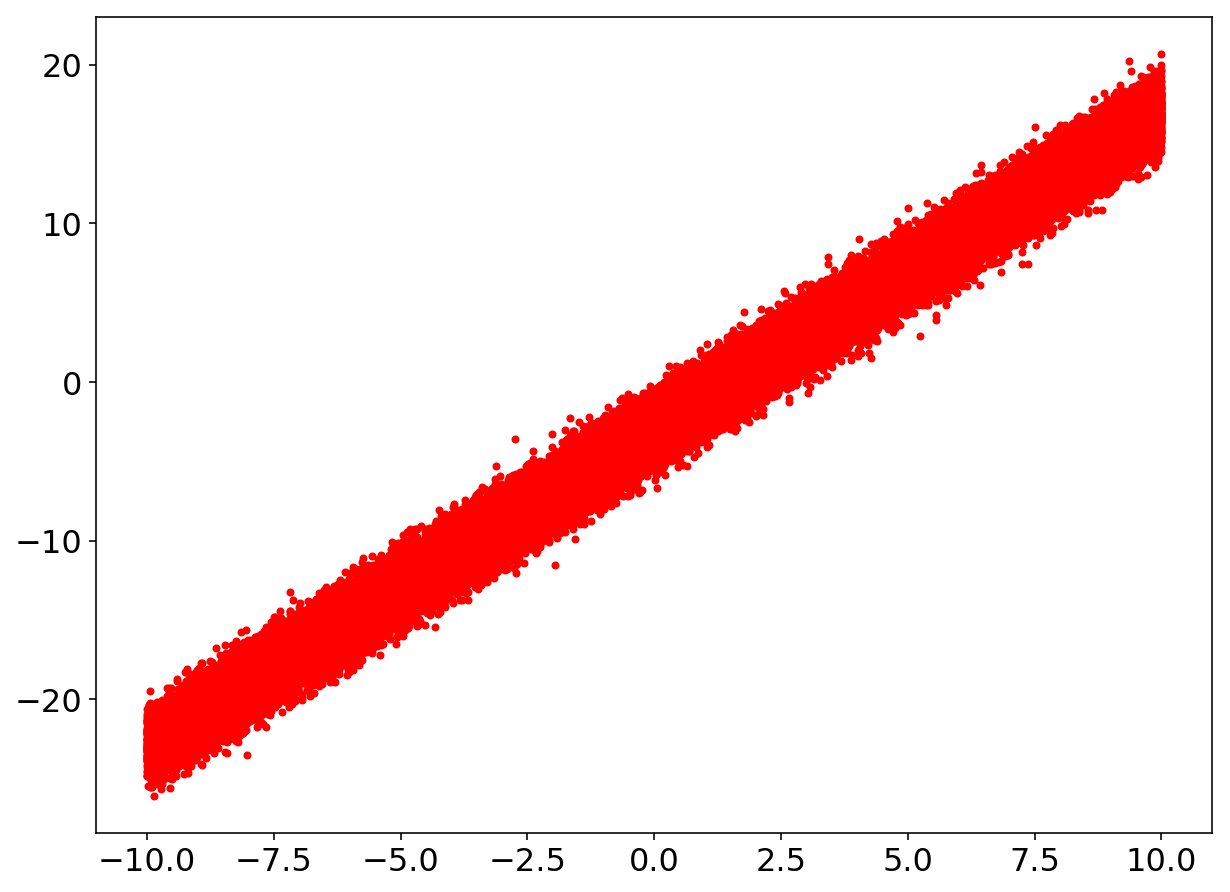

In [5]:
plt.plot(x, y, 'r.')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

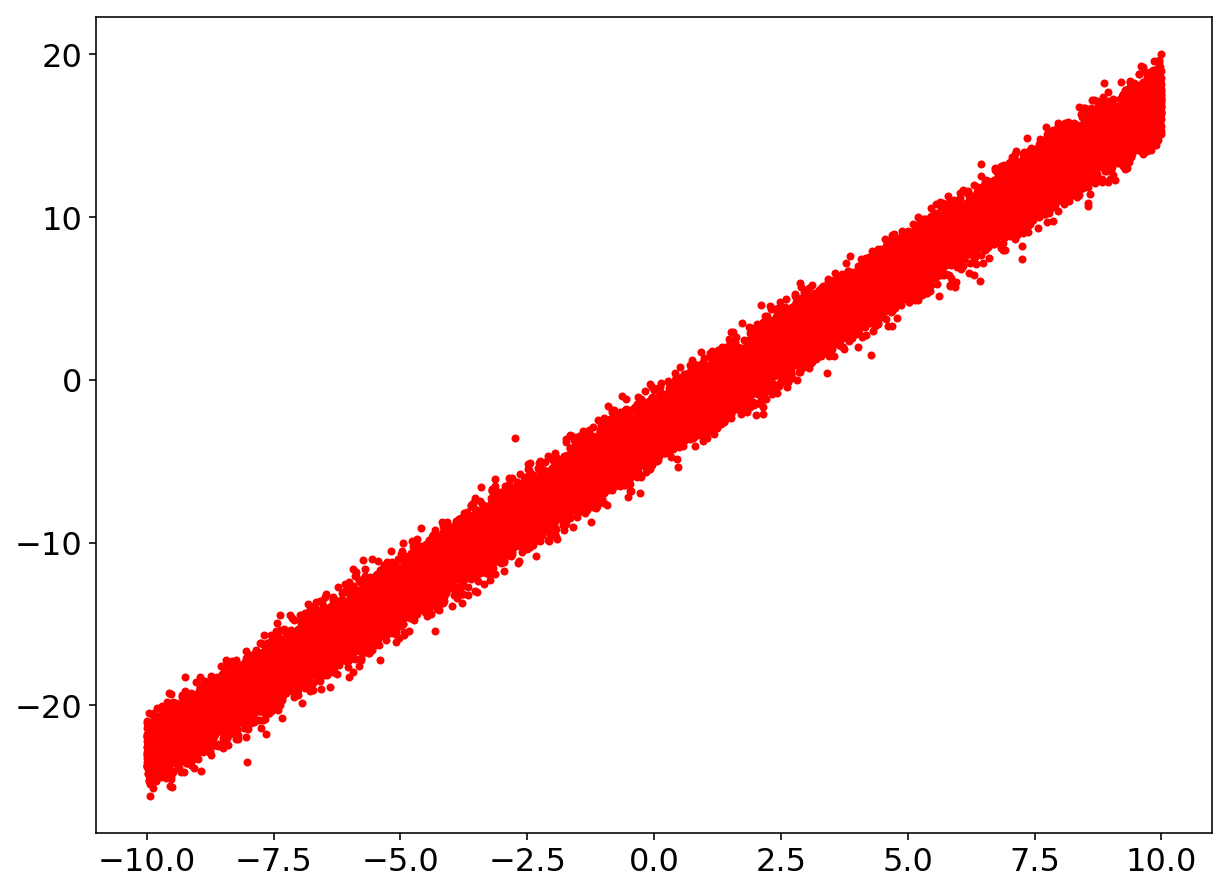

In [7]:
plt.plot(x_test, y_test, 'r.')

In [8]:
log = TensorBoard(log_dir='./logs-2')

In [9]:
model = Sequential()
model.add(Dense(units=1, input_dim=1))

In [10]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mae'])

In [11]:
model.count_params()

2

In [12]:
model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32_ref>]

In [13]:
model.fit(x_train, y_train, epochs=20, batch_size=32, callbacks=[log])

Epoch 1/20
75000/75000 [==============================] - 1s - loss: 1.2279 - mean_absolute_error: 0.8393     
Epoch 2/20
75000/75000 [==============================] - 1s - loss: 1.0154 - mean_absolute_error: 0.8033     
Epoch 3/20
75000/75000 [==============================] - 1s - loss: 1.0160 - mean_absolute_error: 0.8035     
Epoch 4/20
75000/75000 [==============================] - 2s - loss: 1.0167 - mean_absolute_error: 0.8040     
Epoch 5/20
75000/75000 [==============================] - 2s - loss: 1.0162 - mean_absolute_error: 0.8034     
Epoch 6/20
75000/75000 [==============================] - 1s - loss: 1.0171 - mean_absolute_error: 0.8034     
Epoch 7/20
75000/75000 [==============================] - 2s - loss: 1.0157 - mean_absolute_error: 0.8034     
Epoch 8/20
75000/75000 [==============================] - 2s - loss: 1.0157 - mean_absolute_error: 0.8033     
Epoch 9/20
75000/75000 [==============================] - 1s - loss: 1.0163 - mean_absolute_error: 0.8038     
E

In [14]:
x_test[0:3]

array([ 9.652 , -9.8538, -9.5984])

In [15]:
y_test[0:3]

array([ 17.30112722, -21.55724491, -24.06771914])

In [16]:
model.predict(x_test[0:3])

array([[ 16.59784698],
       [-23.0338974 ],
       [-22.51498032]], dtype=float32)

In [17]:
for layer in model.layers:
    print layer.get_weights()

[array([[ 2.03179288]], dtype=float32), array([-3.01301861], dtype=float32)]
